<a href="https://colab.research.google.com/github/nadhimmna/Tugas-Machine-Learning/blob/main/Tugas%20Minggu%203/Classification%20using%20KNN%20on%20iris%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Muhammad Nadhim Abdirrahman
NIM : 1103210018
Kelas : TK4505
Dataset : iris.csv

Promt:
buat kode untuk melakukan model KNN pada dataset iris,
tampilkan kode untuk menampilkan confusion matrix

In [34]:
# library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Mounting google colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


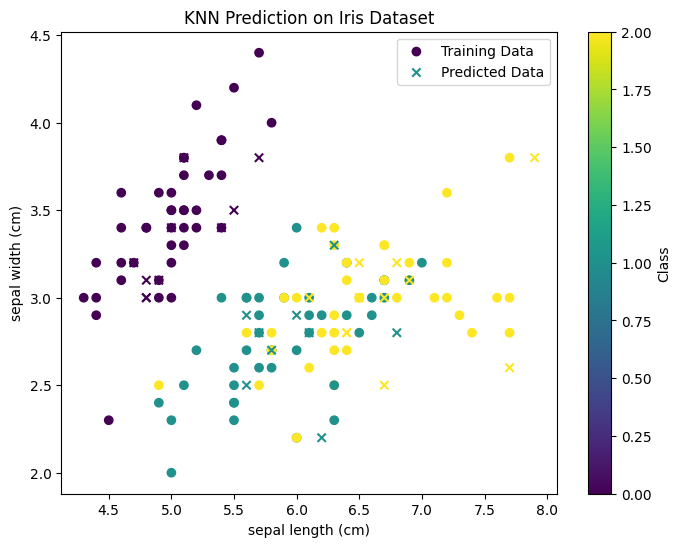

In [35]:
# Baca dataset iris.csv
df = pd.read_csv('/content/drive/My Drive/Machine Learning/iris.csv')
print(df.head())

# Memuat dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Memprediksi kelas untuk data uji
y_pred = knn.predict(X_test)

# Mengevaluasi performa model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualisasi hasil prediksi
plt.figure(figsize=(8, 6))

# Menampilkan data latih
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='Training Data')

# Menampilkan data uji dengan simbol x
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', marker='x', label='Predicted Data')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('KNN Prediction on Iris Dataset')
plt.legend()
plt.colorbar(label='Class')
plt.show()

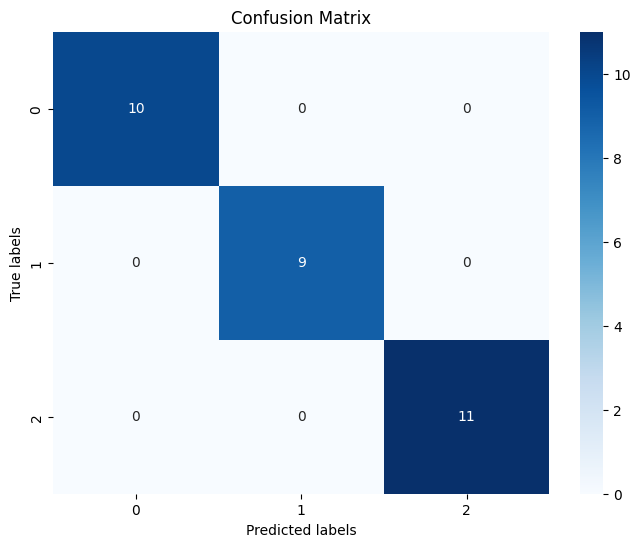

In [36]:
# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()